# Line Plots

## Example 1.

In [12]:
# Step 1. Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [13]:
# Step 2. Load data
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


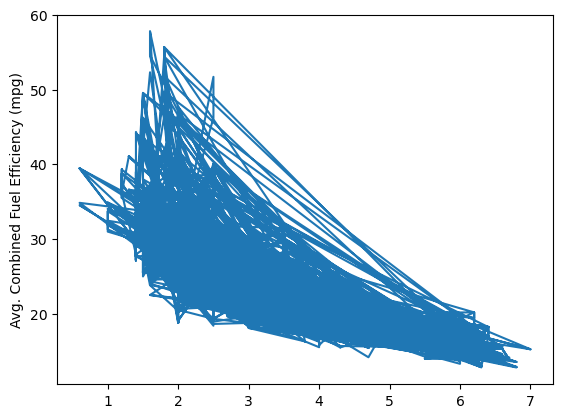

In [14]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

## Example 2.

In [15]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_edges

array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ,
       3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6,
       5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ])

In [16]:
bin_centers = bin_edges[:-1] + 0.1
bin_centers

array([0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1,
       3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7,
       5.9, 6.1, 6.3, 6.5, 6.7, 6.9])

In [17]:
# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

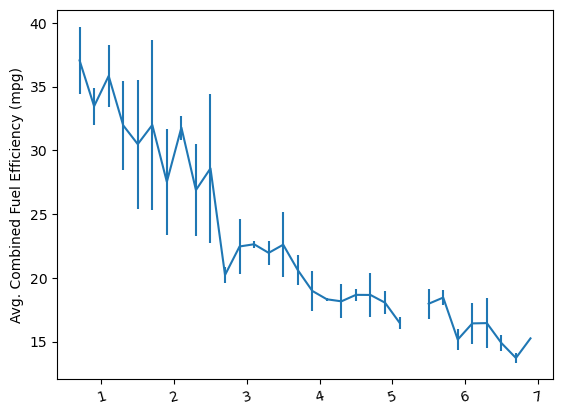

In [18]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

Since the x-variable ('displ') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean.

## Documentation:
Refer to the cut() function syntax.

## Alternate Variations

Note about the DataFrame object used in the examples below
The visualizations below are based on a synthetic dataframe object df, and show the plots based on its numeric (quantitative) variables, num_var1, num_var2, and a categorical (qualitative) variable, cat_var. The new dataframe has been chosen to reflect the additional relationship between the selected variables.


Instead of computing summary statistics on fixed bins, you can also make computations on a rolling window through use of pandas' rolling method. Since the rolling window will make computations on sequential rows of the dataframe, we should use sort_values to put the x-values in ascending order first.

## Example 3.

In [ ]:
# compute statistics in a rolling window
df = fuel_econ 
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

Note that we're also not limited to just one line when plotting. When multiple Matplotlib functions are called one after the other, all of them will be plotted on the same axes. Instead of plotting the mean and error bars, we will plot the three central quartiles, laid on top of the scatterplot.

Another bivariate application of line plots is to plot the distribution of a numeric variable for different levels of a categorical variable. This is another alternative to using violin plots, box plots, and faceted histograms. With the line plot, one line is plotted for each category level, like overlapping the histograms on top of one another. This can be accomplished through multiple errorbar calls using the methods above, or by performing multiple hist calls, setting the "histtype = step" parameter so that the bars are depicted as unfilled lines.

## Example 4.

In [ ]:
bin_edges = np.arange(-3, fuel_econ['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = fuel_econ, hue = 'cat_var') # , size = 5
g.map(plt.hist, "num_var", bins = bin_edges, histtype = 'step')
g.add_legend()

Note that I'm performing the multiple hist calls through the use of FacetGrid, setting the categorical variable on the "hue" parameter rather than the "col" parameter. You'll see more of this parameter of FacetGrid in the next lesson. I've also added an add_legend method call so that we can identify which level is associated with each curve.

Unfortunately, the "Alpha" curve seems to be pretty lost behind the other three curves since the relatively low number of counts is causing a lot of overlap. Perhaps connecting the centers of the bars with a line, like what was seen in the first errorbar example, would be better.

Functions you provide to the map method of FacetGrid objects do not need to be built-ins. Below, I've written a function to perform the summarization operations seen above to plot an errorbar line for each level of the categorical variable, then fed that function (freq_poly) to map.

## Example 5.

In [ ]:
def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)

bin_edges = np.arange(-3, fuel_econ['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = fuel_econ, hue = 'cat_var') # , size = 5
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()

**kwargs is used to allow additional keyword arguments to be set for the errorbar function.

In [ ]:

def freq_poly(x, bins = 10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    
    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()
    
    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)
    
bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, hue = 'cat_var', size = 5)
g.map(freq_poly, "num_var", bins = bin_edges)
g.add_legend()
